# Introdução Data Science - Ana Beatriz Macedo<img src="https://octocat-generator-assets.githubusercontent.com/my-octocat-1626096942740.png" width="324" height="324" align="right">
## Link para download: https://github.com/AnabeatrizMacedo241/DataScience-101
## Github: https://github.com/AnabeatrizMacedo241
## Linkedin: https://www.linkedin.com/in/ana-beatriz-oliveira-de-macedo-85b05b215/
![yellow-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Web Scraping
Web Scraping é a raspagem de dados e informações na internet. Tenha muita consciência ao se usar, pois se tentar raspar dados de sites que não permitem essa atividade, há riscos de ser processado!
Verifique as permissões em https://nome_do_site/robots.txt

In [32]:
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm'
req = requests.get(url)
print(req.status_code) #200 significa que está tudo 'ok' com o site 

200


In [4]:
# Analise o html na variável 'page' e armazene no formato Beautiful Soup
soup = BeautifulSoup(req.content, 'html.parser')

In [18]:
url2 = 'https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm'
page = requests.get(url2)
soup = BeautifulSoup(page.text, 'lxml')
tabela2 = soup.find(class_='table-responsive')
df2 = pd.read_html(str(tabela2)) #Lendo a tabela em HTML
df2[0]

,Rank,Team/NOC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total,RankbyTotal,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


In [14]:
#Segundo jeito
url = 'https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm'
dfs = pd.read_html(url)
df = dfs[0]
print(df)

    Rank                    Team/NOC  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0      1    United States of America          39          41          33   
1      2  People's Republic of China          38          32          18   
2      3                       Japan          27          14          17   
3      4               Great Britain          22          21          22   
4      5                         ROC          20          28          23   
..   ...                         ...         ...         ...         ...   
88    86                       Ghana           0           0           1   
89    86                     Grenada           0           0           1   
90    86                      Kuwait           0           0           1   
91    86         Republic of Moldova           0           0           1   
92    86        Syrian Arab Republic           0           0           1   

    Total  RankbyTotal NOCCode  
0     113            1     USA  
1      88            

In [20]:
#Mudando o nome das colunas
df_index = pd.DataFrame(df.values, columns=['Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Total','Rank by total', 'NOCCode'])

In [21]:
df_index

,Rank,Country,Gold,Silver,Bronze,Total,Rank by total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


In [26]:
#Aqui eu salvo a tabela em um arquivo csv no computador. Funciona com outras plataformas também como Excel(.xlsx)
df_index.to_csv('Toquio2020.csv')

In [27]:
#Checando se funcionou
tabela = pd.read_csv('Toquio2020.csv')
tabela

,Unnamed: 0,Rank,Country,Gold,Silver,Bronze,Total,Rank by total,NOCCode
0,0,1,United States of America,39,41,33,113,1,USA
1,1,2,People's Republic of China,38,32,18,88,2,CHN
2,2,3,Japan,27,14,17,58,5,JPN
3,3,4,Great Britain,22,21,22,65,4,GBR
4,4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...,...
88,88,86,Ghana,0,0,1,1,77,GHA
89,89,86,Grenada,0,0,1,1,77,GRN
90,90,86,Kuwait,0,0,1,1,77,KUW
91,91,86,Republic of Moldova,0,0,1,1,77,MDA


In [28]:
tabela.drop(['Unnamed: 0'], axis=1,inplace=True) #Removendo coluna indesejada

In [29]:
tabela 

,Rank,Country,Gold,Silver,Bronze,Total,Rank by total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


In [70]:
tabela.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### Testando gráficos
![yellow-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<AxesSubplot:title={'center':'Total de medalhas por país - Tóquio 2020'}, xlabel='Country'>

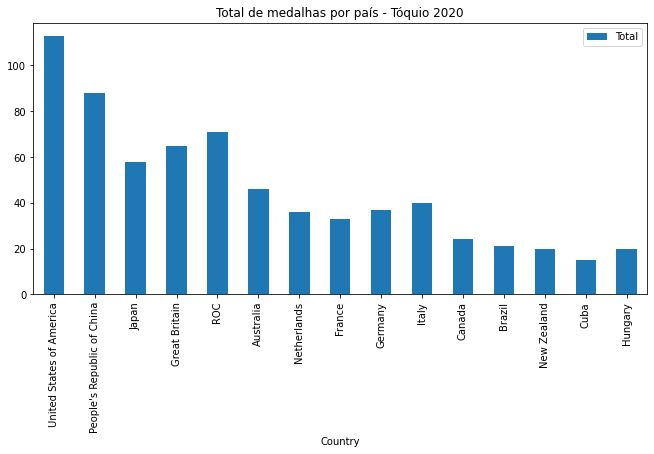

In [46]:
tabela.head(15).plot.bar(x='Country', y='Total', figsize=(11,5), title='Total de medalhas por país - Tóquio 2020')

<AxesSubplot:xlabel='Country', ylabel='Gold'>

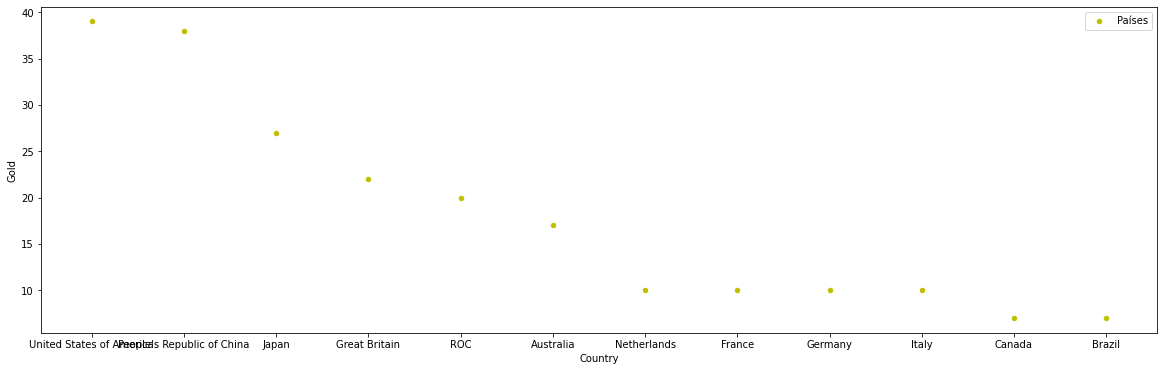

In [62]:
tabela.head(12).plot(kind='scatter', x='Country', y='Gold', figsize=(20, 6), label = 'Países',
                     color = 'y', marker = 'o')

<AxesSubplot:xlabel='Country', ylabel='Silver'>

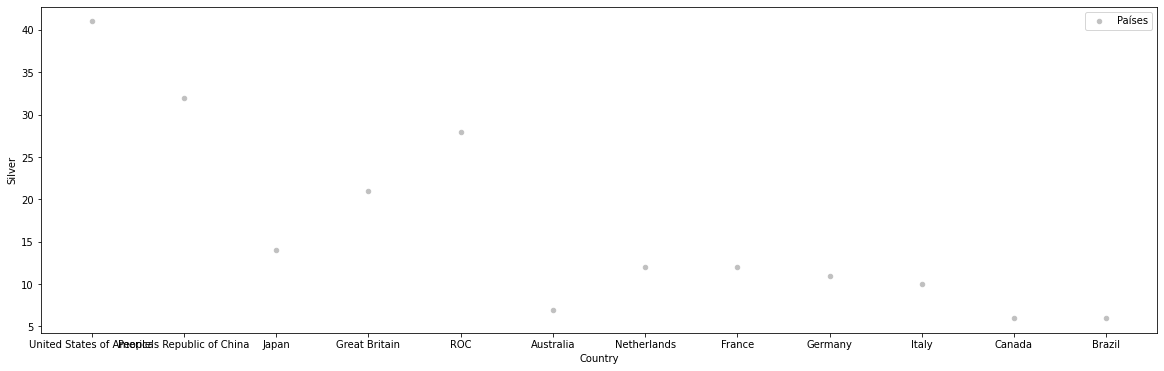

In [65]:
tabela.head(12).plot(kind='scatter', x='Country', y='Silver', figsize=(20, 6), label = 'Países',
                     color = 'silver', marker = 'o')

<AxesSubplot:xlabel='Country', ylabel='Bronze'>

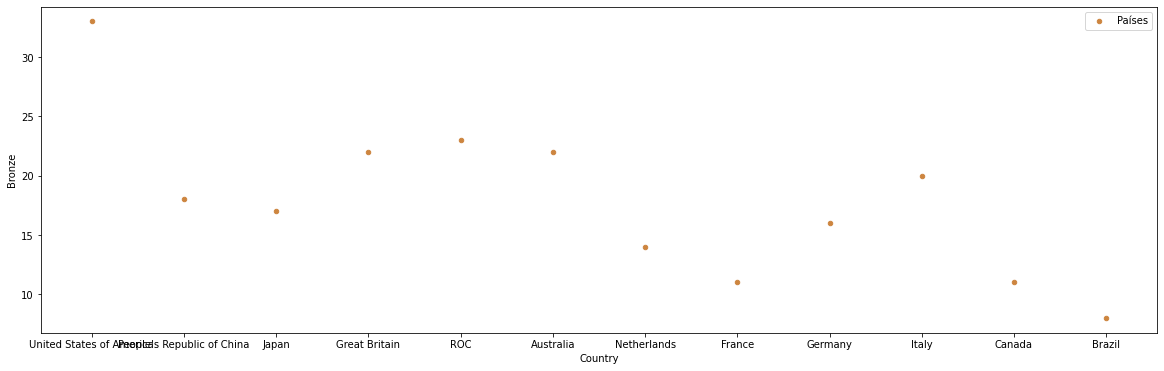

In [66]:
tabela.head(12).plot(kind='scatter', x='Country', y='Bronze', figsize=(20, 6), label = 'Países',
                     color = 'peru', marker = 'o')

### Até a próxima aula e bons estudos!
## Ana Beatriz Macedo
![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)